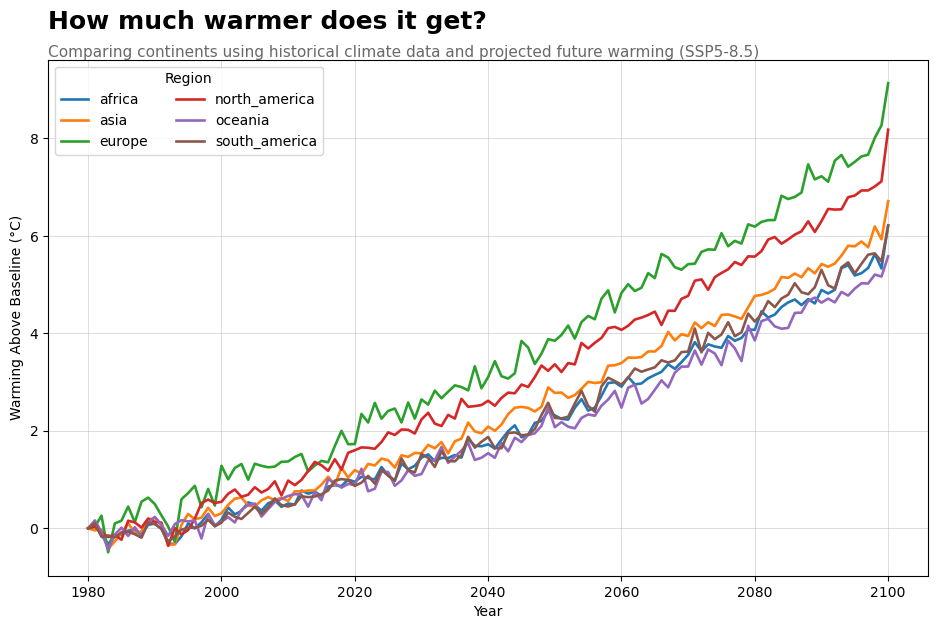

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- config ---
CSV_PATH = Path("data/cmip6_continents_tas_pr_1980_2100.csv")
TITLE = "How much warmer does it get?"
SUBTITLE = "Comparing continents using historical climate data and projected future warming (SSP5-8.5)"
Y_LABEL = "Warming Above Baseline (°C)"
EXCLUDE = {"antarctica", "global"}  # hide Antarctica & global

# --- load ---
df = pd.read_csv(CSV_PATH, usecols=["year", "region", "tas_anomaly"])
df = df[~df["region"].str.lower().isin({r.lower() for r in EXCLUDE})]
wide = df.pivot(index="year", columns="region", values="tas_anomaly").sort_index()

# --- plot ---
fig, ax = plt.subplots(figsize=(10, 6))
wide.plot(ax=ax, linewidth=1.9)

ax.set_xlabel("Year")
ax.set_ylabel(Y_LABEL)
ax.grid(True, linewidth=0.5, alpha=0.6)
ax.legend(title="Region", ncol=2, frameon=True)

# Remove the default title and push the axes up a touch
ax.set_title("")
fig.subplots_adjust(top=0.98, left=0.09, right=0.97, bottom=0.12)

# Title + subtitle INSIDE the axes, left-aligned, very tight spacing
ax.text(
    0.0, 1.05, TITLE,
    transform=ax.transAxes, ha="left", va="bottom",
    fontsize=18, fontweight="bold", clip_on=False
)
ax.text(
    0.0, 1.00, SUBTITLE,
    transform=ax.transAxes, ha="left", va="bottom",
    fontsize=11, color="dimgray", clip_on=False
)

plt.show()
